### with adjusting feature scaling and outliers and.....

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('E:\\All Datasets\\hearing_test.csv')
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


### EDA and visualtion

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

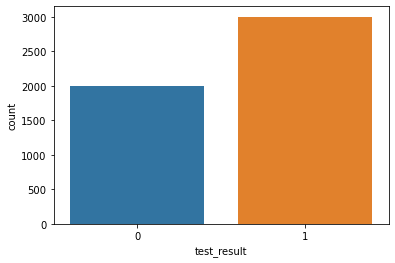

In [6]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

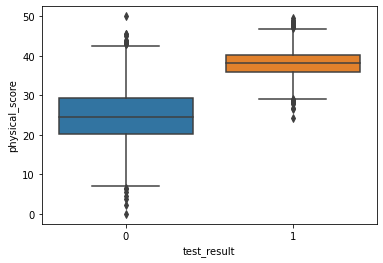

In [7]:
# this not outlier graph

sns.boxplot(data=df,x='test_result',y='physical_score')

In [8]:
df.isnull().sum()   # there is no missing values

age               0
physical_score    0
test_result       0
dtype: int64

In [9]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [10]:
# now remove outliers afterwards we do transformation and scaling

<AxesSubplot:xlabel='age'>

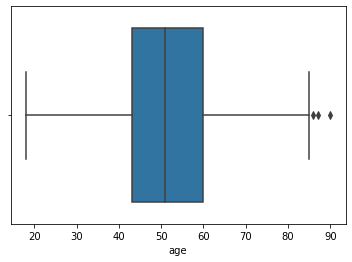

In [11]:
sns.boxplot(data=df,x='age')

<AxesSubplot:xlabel='physical_score'>

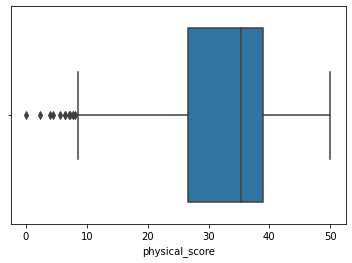

In [12]:
sns.boxplot(data=df,x='physical_score')

In [13]:
# In both column we have outlier so we remove using winsorizer
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold='1.5')
df_win=win.fit_transform()

TypeError: '<=' not supported between instances of 'str' and 'int'

In [14]:
#outliers
# here more number of outliers present so we don not remove but we use winsorizer tech.
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5)
df[['age','physical_score']]=win.fit_transform(df[['age','physical_score']])

In [15]:
df.head(3)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0


<AxesSubplot:xlabel='age'>

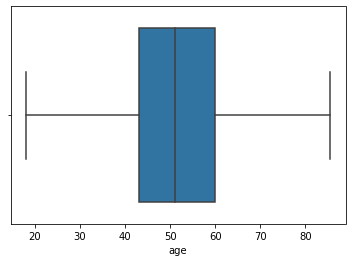

In [16]:
sns.boxplot(data=df,x='age')

<AxesSubplot:xlabel='physical_score'>

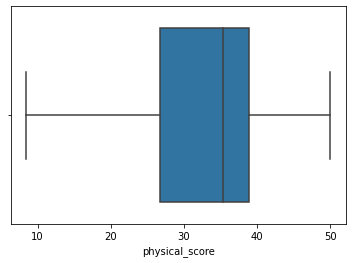

In [17]:
sns.boxplot(data=df,x='physical_score')

In [18]:
# so outliers are removed
df.skew()
# so all columns are noraml

age               0.218073
physical_score   -0.761203
test_result      -0.408371
dtype: float64

In [19]:
df['age_1']=df['age']**(1/1.68)
df['age_1'].skew()

0.0007871242492252728

In [20]:
df['physical_score_1']=df['physical_score']**(2.899)
df['physical_score_1'].skew()

0.01789951015278379

In [21]:
df.drop(columns=['age','physical_score'],inplace=True)

In [22]:
df

,test_result,age_1,physical_score_1
0,1,8.014517,46367.554632
1,1,10.263410,35727.611455
2,0,10.505835,10900.049432
3,0,10.979640,21059.960410
4,1,8.300192,54012.426713
...,...,...,...
4995,0,12.856441,478.063570
4996,1,11.095927,27292.852309
4997,1,10.140727,28716.900051
4998,1,8.716605,67800.926045


In [23]:
df.skew()

test_result        -0.408371
age_1               0.000787
physical_score_1    0.017900
dtype: float64

<AxesSubplot:xlabel='age_1', ylabel='physical_score_1'>

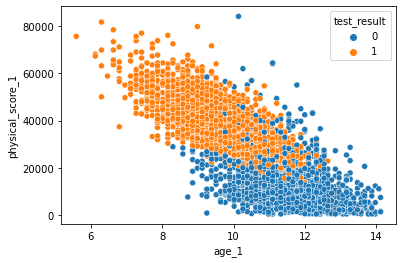

In [24]:
sns.scatterplot(data=df,x='age_1',y='physical_score_1',hue='test_result')

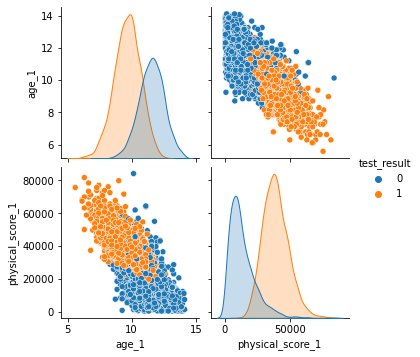

In [25]:
sns.pairplot(data=df,hue='test_result')

<AxesSubplot:>

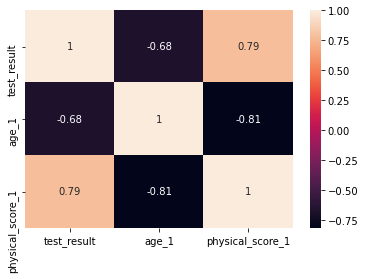

In [26]:
# heat map
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score_1', ylabel='test_result'>

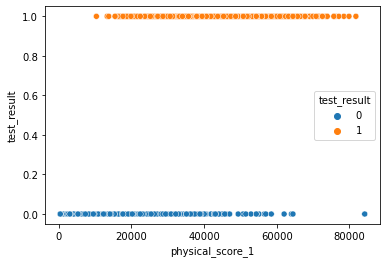

In [27]:
sns.scatterplot(data=df,x='physical_score_1',y='test_result',hue='test_result')

<AxesSubplot:xlabel='age_1', ylabel='test_result'>

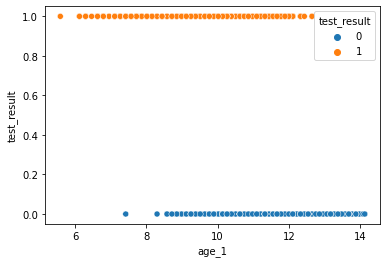

In [28]:
sns.scatterplot(data=df,x='age_1',y='test_result',hue='test_result')

In [29]:
x=df.drop('test_result',axis=1)
y=df['test_result']
print(x.head(2))
print(y.head(2))

       age_1  physical_score_1
0   8.014517      46367.554632
1  10.263410      35727.611455
0    1
1    1
Name: test_result, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [31]:
x_train.head(3)

,age_1,physical_score_1
3709,10.385103,27998.945904
1585,8.014517,51851.428425
780,10.263410,40669.037501


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x_train=sc.fit_transform(x_train)
scaled_x_test=sc.fit_transform(x_test)

In [33]:
pd.DataFrame(scaled_x_train).head(4)

,0,1
0,-0.001581,-0.051776
1,-1.742722,1.449657
2,-0.090962,0.745763
3,-0.363549,0.263895


In [34]:
pd.DataFrame(scaled_x_test).head(4)

,0,1
0,-1.438529,1.250286
1,0.148146,-0.851180
2,-1.041841,0.946097
3,-0.384369,0.792479


## Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

## Model performance on classification tasks

In [36]:
y_pred=log_model.predict(scaled_x_test)
pd.DataFrame(y_pred).head()

,0
0,1
1,0
2,1
3,1
4,1


In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9186666666666666

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[540,  74],
       [ 48, 838]], dtype=int64)

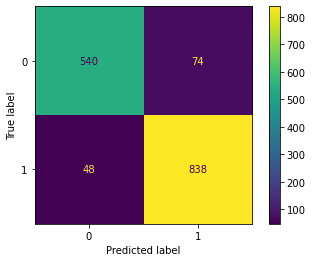

In [40]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(log_model,scaled_x_test,y_test)
plt.show()

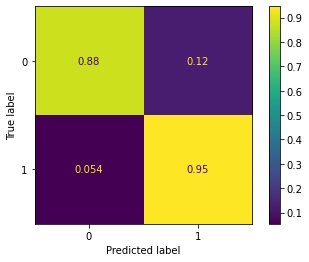

In [41]:
plot_confusion_matrix(log_model,scaled_x_test,y_test,normalize='true')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       614
           1       0.92      0.95      0.93       886

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



## Auc

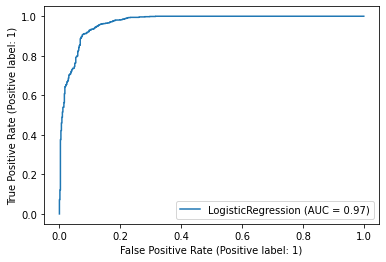

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,scaled_x_test,y_test)